In [227]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.layers as layers
from tensorflow.keras.callbacks import EarlyStopping

In [228]:
result_dir = "data/CCPD2020/test_new"
input_dir = "data/CCPD2020/processed_images"
val_result = "data/CCPD2020/val_new"
val_dir = "data/CCPD2020/val_processed_images"
img_height = 256
img_width = 256
batch_size = 1

In [229]:
input_dataset = tf.keras.utils.image_dataset_from_directory(
    input_dir,
    labels = None,
    image_size=(img_height,img_width),
    batch_size = batch_size,
    shuffle = False
)
resut_dataset = tf.keras.utils.image_dataset_from_directory(
    result_dir,
    labels = None,
    image_size=(img_height,img_width),
    batch_size = batch_size,
    shuffle = False
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels = None,
    image_size=(img_height,img_width),
    batch_size = batch_size,
    shuffle = False
)

val_result_dataset = tf.keras.utils.image_dataset_from_directory(
    val_result,
    labels = None,
    image_size=(img_height,img_width),
    batch_size = batch_size,
    shuffle = False
)

Found 51 files.


Found 51 files.
Found 29 files.
Found 29 files.


In [230]:
x_train = tf.concat([x for x in input_dataset], axis=0).numpy().reshape([-1,img_height,img_width,3])
y_train = tf.concat([y for y in resut_dataset], axis=0).numpy().reshape([-1,img_height,img_width,3])

In [231]:
x_gray = np.mean(x_train,axis=3)
y_gray = np.mean(y_train,axis=3)

In [232]:
x_train = x_gray*1./255
y_train = y_gray*1./255

In [233]:
x_val_train = tf.concat([x for x in val_dataset], axis=0).numpy().reshape([-1,img_height,img_width,3])
y_val_train = tf.concat([y for y in val_result_dataset], axis=0).numpy().reshape([-1,img_height,img_width,3])

In [234]:
x_gray = np.mean(x_val_train,axis=3)
y_gray = np.mean(y_val_train,axis=3)

In [235]:
x_val_train = x_gray*1./255
y_val_train = y_gray*1./255

In [236]:
dropout_encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(img_height,img_width,1)),
      layers.Conv2D(8 ,(3, 3), activation='relu', padding='same'),
      #layers.MaxPooling2D((2,2), padding='same'),
      #layers.BatchNormalization(),
      layers.Conv2D(16 ,(3, 3), activation='relu', padding='same'),
      #layers.MaxPooling2D((2,2), padding='same'),
      #layers.BatchNormalization(),
      layers.Conv2D(32 ,(3, 3), activation='relu', padding='same'),
      #layers.MaxPooling2D((2,2), padding='same'),
      #layers.BatchNormalization(),
      layers.Conv2D(64 ,(3, 3), activation='relu', padding='same'),
      #layers.Conv2D(128 ,(3, 3), activation='relu', padding='same'),
      #layers.Conv2D(256 ,(3, 3), activation='relu', padding='same',strides=2),
      #layers.Conv2D(512 ,(3, 3), activation='relu', padding='same',strides=2),
  #    layers.MaxPooling2D((3,3), padding='same'),
     # layers.Conv2D(8, (5, 5), activation='relu', padding='same', strides=2)
])

dropout_decoder = tf.keras.Sequential([

      #layers.Conv2DTranspose(512, (5,5), strides=2, activation='relu', padding='same'),
      #layers.Conv2DTranspose(256, (5,5), strides=2, activation='relu', padding='same'),
      #layers.Conv2DTranspose(128, (3,3), activation='relu', padding='same'),
      layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same'),
      #layers.UpSampling2D(size=(2,2), interpolation="nearest"),
      layers.Conv2DTranspose(32, (3,3), activation='relu', padding='same'),
      #layers.UpSampling2D(size=(2,2), interpolation="nearest"),
      #layers.Conv2DTranspose(8, (3,3), activation='relu', padding='same',),
      layers.Conv2DTranspose(16, (3,3), activation='relu', padding='same'),
      #layers.UpSampling2D(size=(2,2), interpolation="nearest"),
      layers.Conv2DTranspose(8, (3,3), activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
      
])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
dropout_ae = tf.keras.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss = "mae", optimizer = "nadam")
history = dropout_ae.fit(x_train, y_train, epochs = 20, validation_data=(x_val_train, y_val_train), callbacks = [es])

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - loss: 0.2598 - val_loss: 0.2458
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - loss: 0.2507 - val_loss: 0.2320
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - loss: 0.2431 - val_loss: 0.2625
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - loss: 0.2649 - val_loss: 0.2229
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - loss: 0.2297 - val_loss: 0.2105
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - loss: 0.2159 - val_loss: 0.2011
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - loss: 0.2289 - val_loss: 0.2397
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - loss: 0.2407 - val_loss: 0.1992
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - loss: 0.1983 - val_loss: 0.1770
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - loss: 0.1634 - val_loss: 0.1924
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - loss: 0.1779 - val_loss: 0.1325
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - loss: 0.1183 - val_loss: 0.0816
Epoch 13/20
2/2 ━━━━━

In [237]:
def plot_reconstructions(model, images, original_images, n_images=10):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1) #restrict predicted pixel values to lie between 0 and 1
    fig = plt.figure(figsize=(n_images * 5, 20))
    for image_index in range(n_images):
        plt.subplot(3, n_images, 1 + image_index)
        plt.imshow(original_images[image_index])
        plt.axis("off")
        plt.subplot(3, n_images, 1 + n_images + image_index)
        plt.imshow(images[image_index])
        plt.axis("off")
        plt.subplot(3, n_images, 1 + 2*n_images + image_index)
        plt.imshow(reconstructions[image_index])
        plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


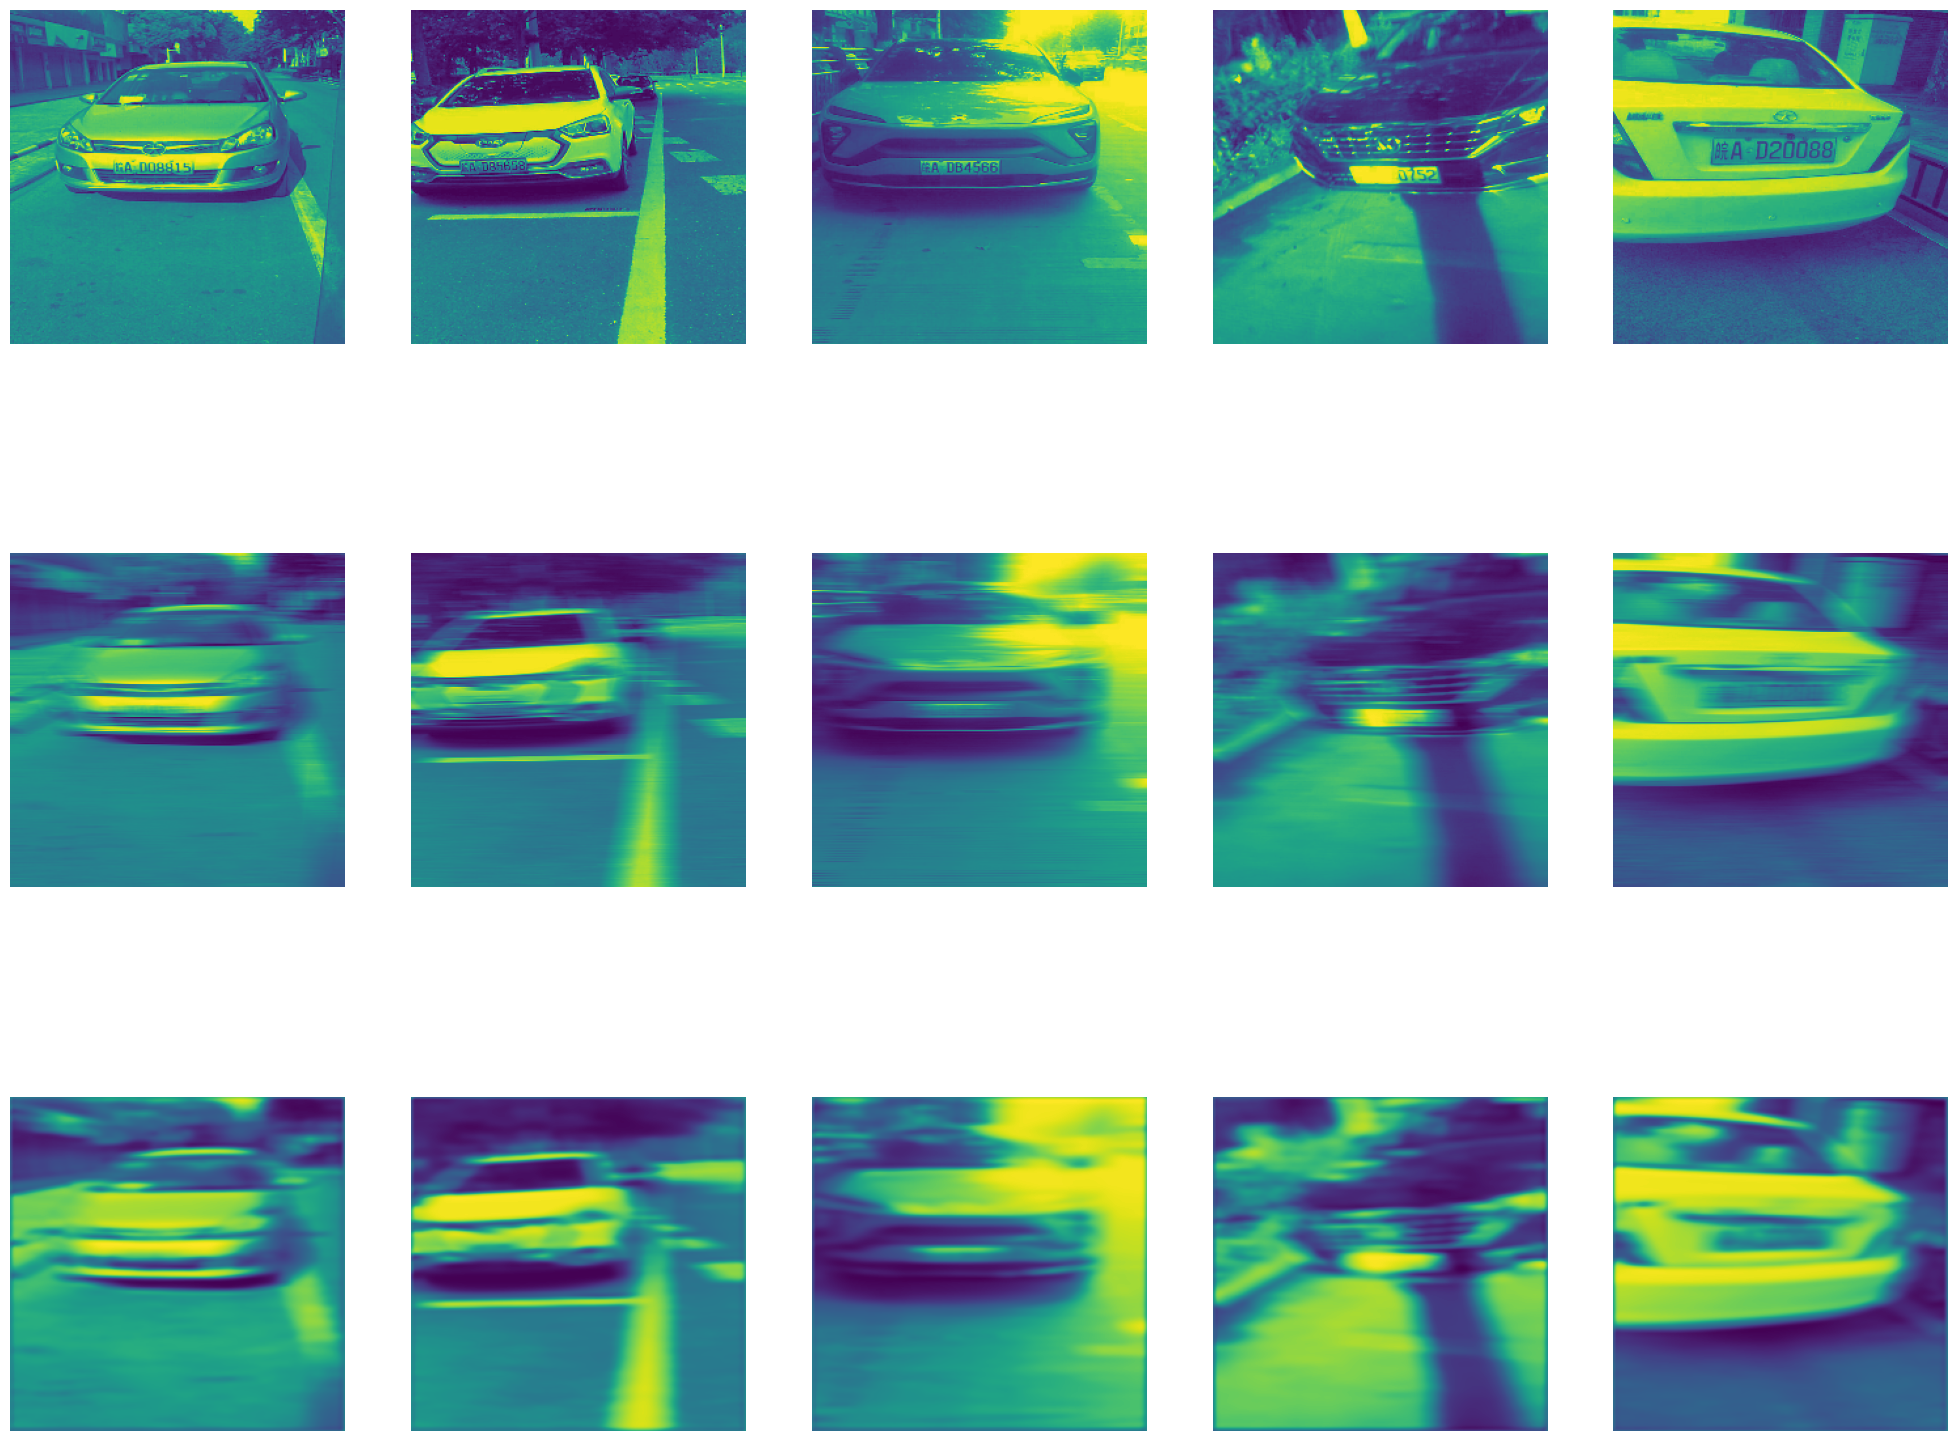

In [238]:
plot_reconstructions(dropout_ae,x_train,y_train,5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


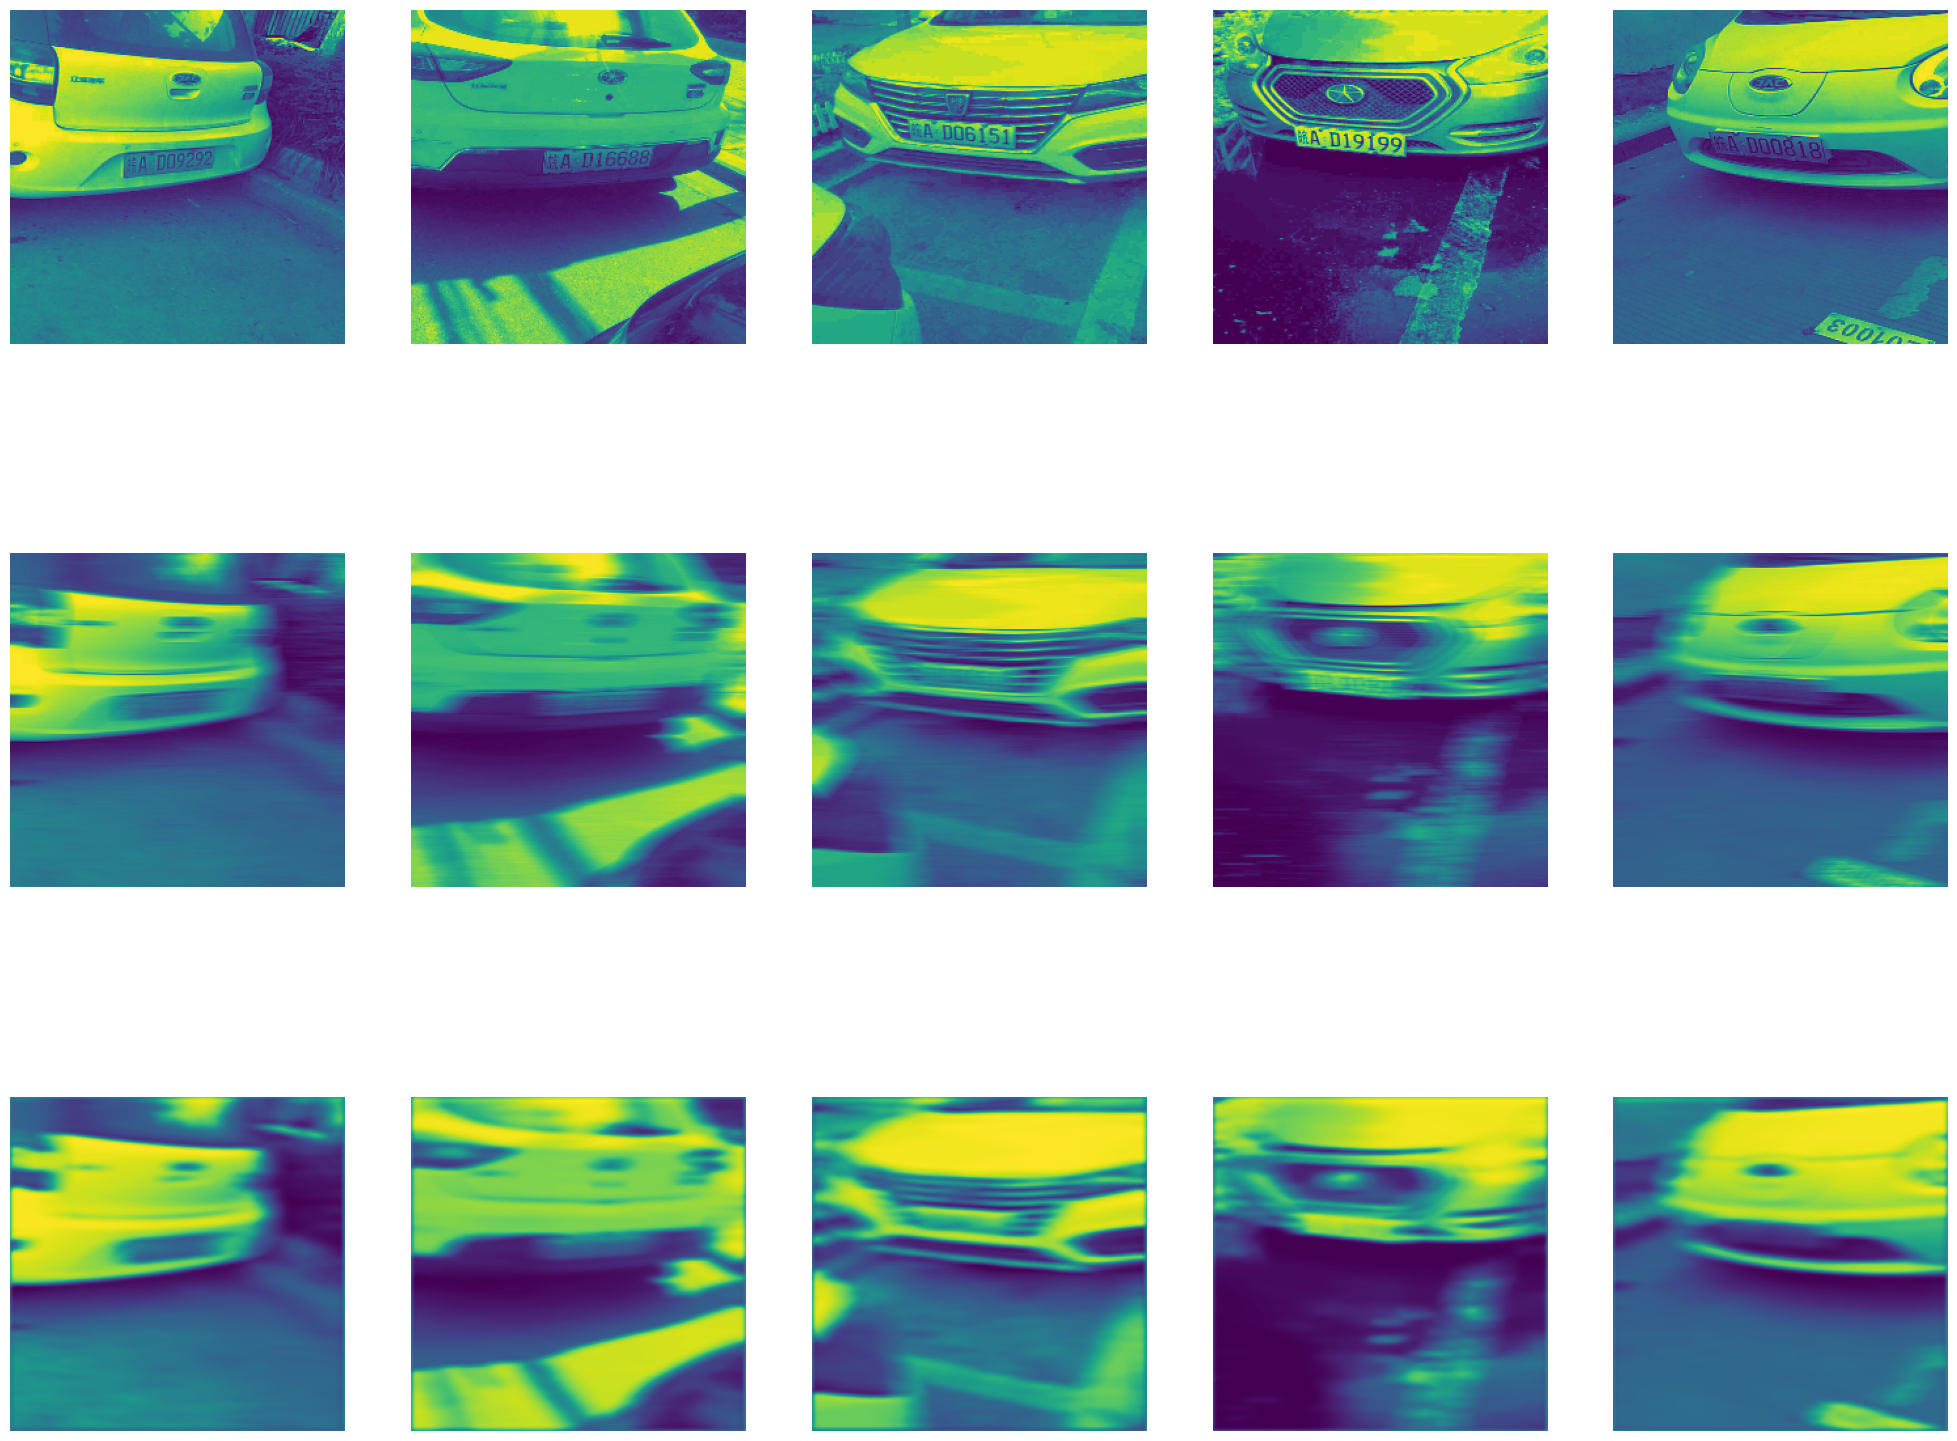

In [239]:
plot_reconstructions(dropout_ae,x_val_train,y_val_train,5)